# IMPORTS AND READING THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('diabetes2.csv')

In [7]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA CLEANING

In [8]:
for column in df.columns:
    per=np.mean(df[column].isnull())
    per=per*100
    print(f' the {column} column has {per}% nulls')
#No missing-data

 the Pregnancies column has 0.0% nulls
 the Glucose column has 0.0% nulls
 the BloodPressure column has 0.0% nulls
 the SkinThickness column has 0.0% nulls
 the Insulin column has 0.0% nulls
 the BMI column has 0.0% nulls
 the DiabetesPedigreeFunction column has 0.0% nulls
 the Age column has 0.0% nulls
 the Outcome column has 0.0% nulls


# DATA EXPLORATION-FINDING CORELLATION BETWEEN COLUMNS

<AxesSubplot:xlabel='Outcome', ylabel='count'>

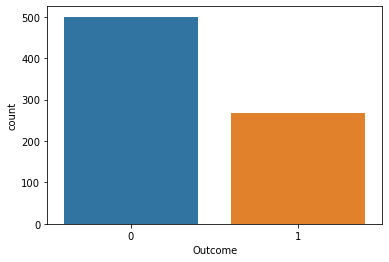

In [9]:
sns.countplot(x='Outcome',data=df)
#Most people do not have the disease

C:\Users\pasxa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

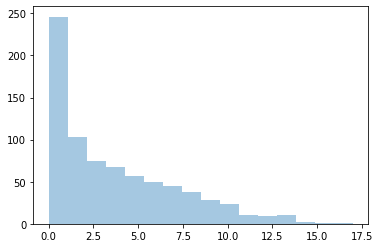

In [10]:
sns.distplot(x=df['Pregnancies'],kde=False)


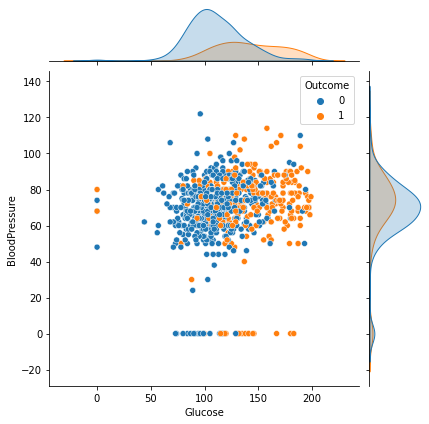

In [11]:
sns.jointplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
#Most people who have the disease have higher glucose and blood pressure which makes sense

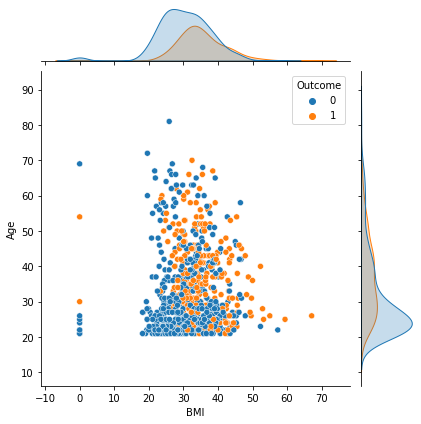

In [12]:
sns.jointplot(x='BMI',y='Age',hue='Outcome',data=df)
#We can see that most people who have the disease are older thna 30 and their bmi is above 30

<AxesSubplot:>

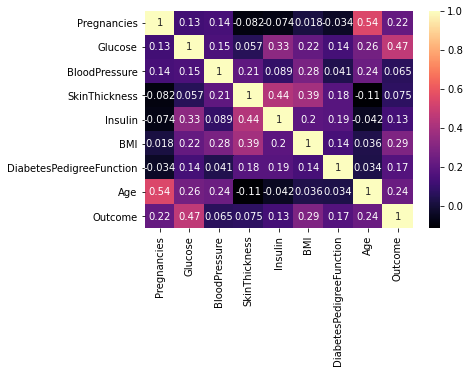

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='magma')
#seeing the correlation diagram
#highest correlations between age and pregnacies and glucose and outcome

In [14]:
corr_pairs=df.corr().unstack()
corr_pairs=corr_pairs.sort_values()
corr_pairs.tail(15)
#highest correlation pairs

Insulin                   SkinThickness               0.436783
SkinThickness             Insulin                     0.436783
Glucose                   Outcome                     0.466581
Outcome                   Glucose                     0.466581
Age                       Pregnancies                 0.544341
Pregnancies               Age                         0.544341
                          Pregnancies                 1.000000
Insulin                   Insulin                     1.000000
DiabetesPedigreeFunction  DiabetesPedigreeFunction    1.000000
BMI                       BMI                         1.000000
SkinThickness             SkinThickness               1.000000
BloodPressure             BloodPressure               1.000000
Glucose                   Glucose                     1.000000
Age                       Age                         1.000000
Outcome                   Outcome                     1.000000
dtype: float64

In [15]:
df1=df[df['Pregnancies']==0].assign(Gender='Male')
df1
df2=df[df['Pregnancies']>0].assign(Gender='Female')
df2
df3=pd.concat([df1,df2],axis=0)
df3.sort_index(inplace=True)
df=df3
df
#we have added a new column to the original Dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,Female
1,1,85,66,29,0,26.6,0.351,31,0,Female
2,8,183,64,0,0,23.3,0.672,32,1,Female
3,1,89,66,23,94,28.1,0.167,21,0,Female
4,0,137,40,35,168,43.1,2.288,33,1,Male
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Female
764,2,122,70,27,0,36.8,0.340,27,0,Female
765,5,121,72,23,112,26.2,0.245,30,0,Female
766,1,126,60,0,0,30.1,0.349,47,1,Female


<AxesSubplot:xlabel='Gender', ylabel='count'>

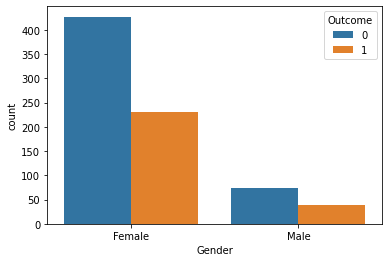

In [18]:
sns.countplot(x='Gender',hue='Outcome',data=df)
#More females have the disease.About 1/3 of men and women  have the disease

C:\Users\pasxa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


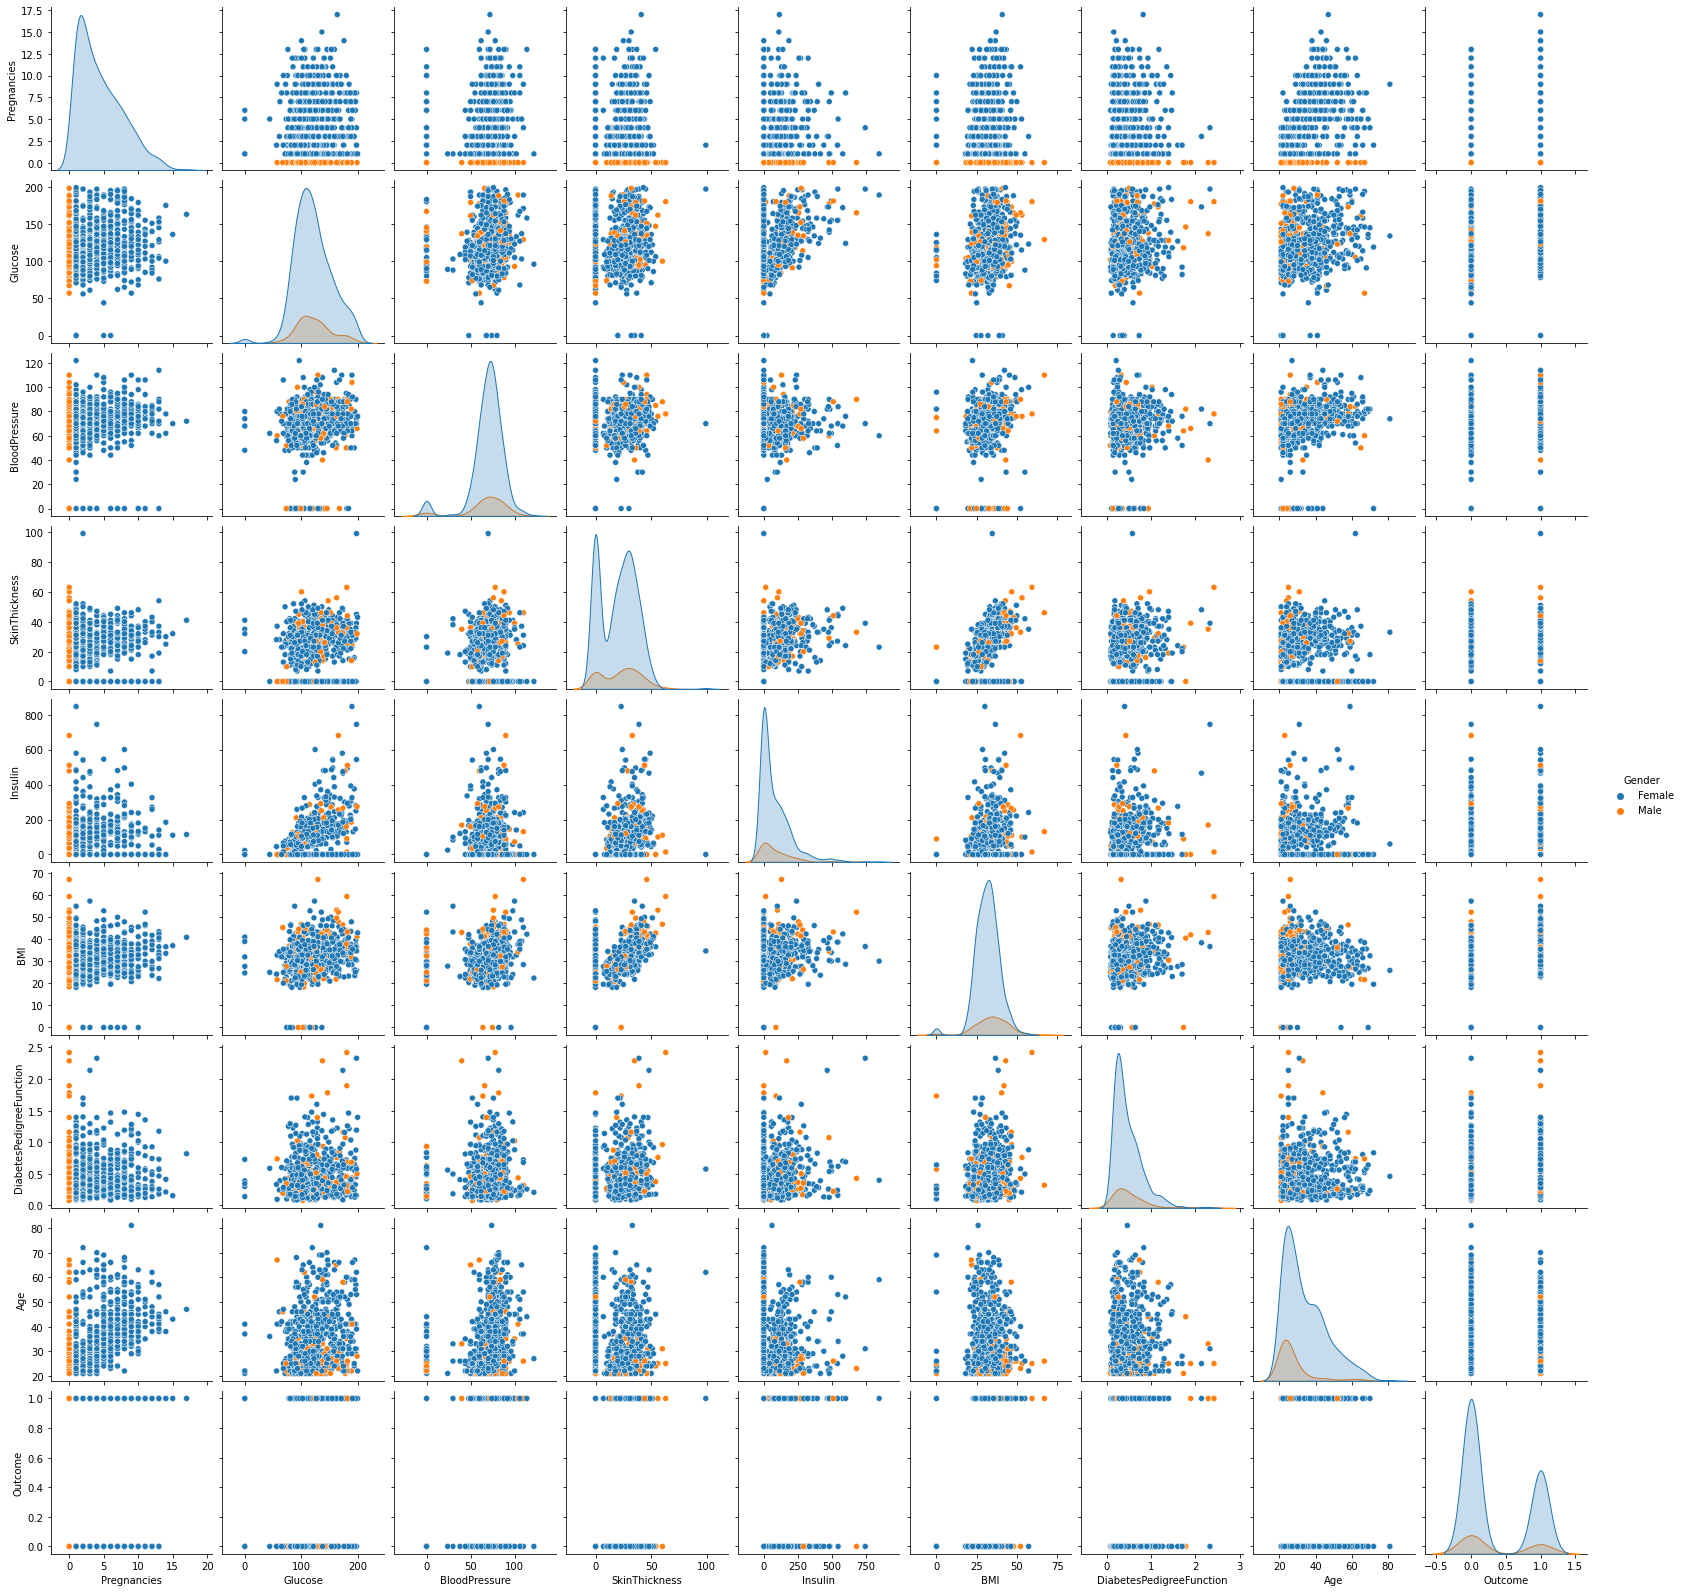

In [17]:
sns.pairplot(df,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

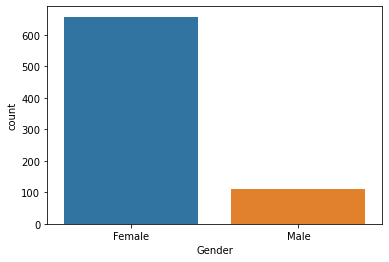

In [19]:
sns.countplot(x=df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='BMI'>

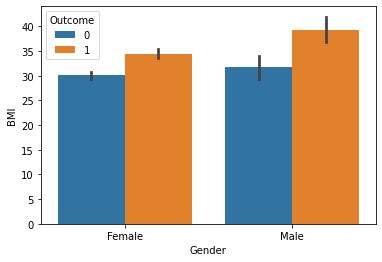

In [20]:
sns.barplot(x='Gender',y='BMI',hue='Outcome',data=df)
#both men and women who have the disease have more BMI than the ones who dont.

<AxesSubplot:xlabel='Gender', ylabel='Insulin'>

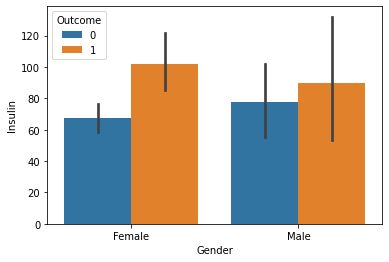

In [21]:
sns.barplot(x='Gender',y='Insulin',hue='Outcome',data=df)
#women who have the disease have higher levels of insuline.The same for men.

SOME DATA-CLEANING TO THE NEW DATAFRAME BEFORE LINEAR PROGRESSION



In [22]:
sex=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df,sex],axis=1)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender,Male
0,6,148,72,35,0,33.6,0.627,50,1,Female,0
1,1,85,66,29,0,26.6,0.351,31,0,Female,0
2,8,183,64,0,0,23.3,0.672,32,1,Female,0
3,1,89,66,23,94,28.1,0.167,21,0,Female,0
4,0,137,40,35,168,43.1,2.288,33,1,Male,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Female,0
764,2,122,70,27,0,36.8,0.340,27,0,Female,0
765,5,121,72,23,112,26.2,0.245,30,0,Female,0
766,1,126,60,0,0,30.1,0.349,47,1,Female,0


In [187]:
df




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender,Male
0,6,148,72,35,0,33.6,0.627,50,1,Female,0
1,1,85,66,29,0,26.6,0.351,31,0,Female,0
2,8,183,64,0,0,23.3,0.672,32,1,Female,0
3,1,89,66,23,94,28.1,0.167,21,0,Female,0
4,0,137,40,35,168,43.1,2.288,33,1,Male,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Female,0
764,2,122,70,27,0,36.8,0.340,27,0,Female,0
765,5,121,72,23,112,26.2,0.245,30,0,Female,0
766,1,126,60,0,0,30.1,0.349,47,1,Female,0


# LOGISTIC REGRESSION MODEL TO PREDICT WHEATHER SOMEONE HAS THE DISEASE OR NOT

In [23]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender,Male
0,6,148,72,35,0,33.6,0.627,50,1,Female,0
1,1,85,66,29,0,26.6,0.351,31,0,Female,0
2,8,183,64,0,0,23.3,0.672,32,1,Female,0
3,1,89,66,23,94,28.1,0.167,21,0,Female,0
4,0,137,40,35,168,43.1,2.288,33,1,Male,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Female,0
764,2,122,70,27,0,36.8,0.340,27,0,Female,0
765,5,121,72,23,112,26.2,0.245,30,0,Female,0
766,1,126,60,0,0,30.1,0.349,47,1,Female,0


In [30]:

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

# RESULTS

In [34]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

[[132  18]
 [ 32  49]]


In [40]:
TN=132#true positives
TP=49#true negatives
FP=18#false positives
FN=32#false negatives
ACC=(TN+TP)/(TN+TP+FP+FN)
print(f'The accuracy of the model is {round(ACC*100,1)} % while the error rate is {round((1-ACC)*100,1)} %')

The accuracy of the model is 78.4 % while the error rate is 21.6 %
